In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


In [5]:
df = pd.read_csv("bank-direct-marketing-campaigns.csv")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [6]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [16]:
total_contacts = len(df)

leads = df[df["campaign"] > 1].shape[0]

customers = df[df["y"] == "yes"].shape[0]

total_contacts, leads, customers


(41188, 23546, 4640)

In [11]:
funnel = pd.DataFrame({
    "Stage": ["Total Contacts", "Leads", "Customers"],
    "Count": [total_contacts, leads, customers]
})

funnel


,Stage,Count
0,Total Contacts,41188
1,Leads,23546
2,Customers,4640


In [12]:
traffic_to_lead = leads / total_contacts * 100
lead_to_customer = customers / leads * 100
traffic_to_customer = customers / total_contacts * 100

traffic_to_lead, lead_to_customer, traffic_to_customer


(57.16713605904632, 19.706107194427926, 11.265417111780131)

In [13]:
drop_traffic_to_lead = total_contacts - leads
drop_lead_to_customer = leads - customers

drop_traffic_to_lead, drop_lead_to_customer


(17642, 18906)

In [14]:
contact_conversion = (
    df.groupby("contact")["y"]
    .apply(lambda x: (x == "yes").mean() * 100)
    .reset_index(name="Conversion Rate (%)")
)

contact_conversion


,contact,Conversion Rate (%)
0,cellular,14.737607
1,telephone,5.231321


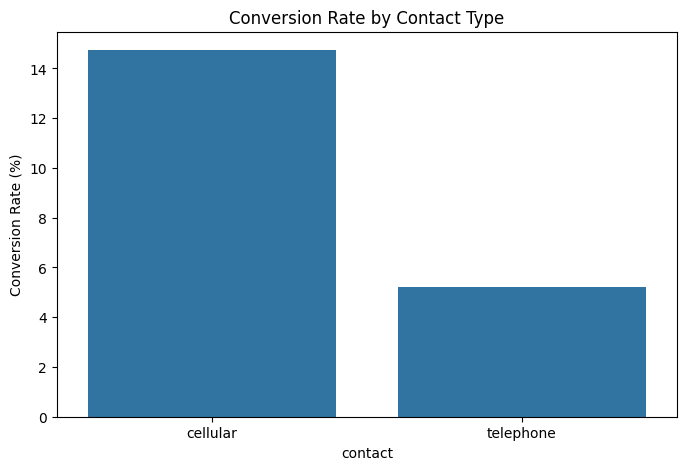

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(data=contact_conversion, x="contact", y="Conversion Rate (%)")
plt.title("Conversion Rate by Contact Type")
plt.show()


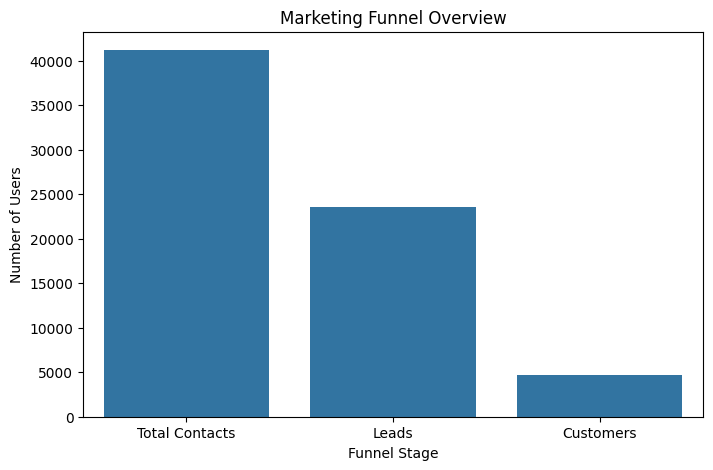

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data=funnel, x="Stage", y="Count")
plt.title("Marketing Funnel Overview")
plt.ylabel("Number of Users")
plt.xlabel("Funnel Stage")
plt.show()


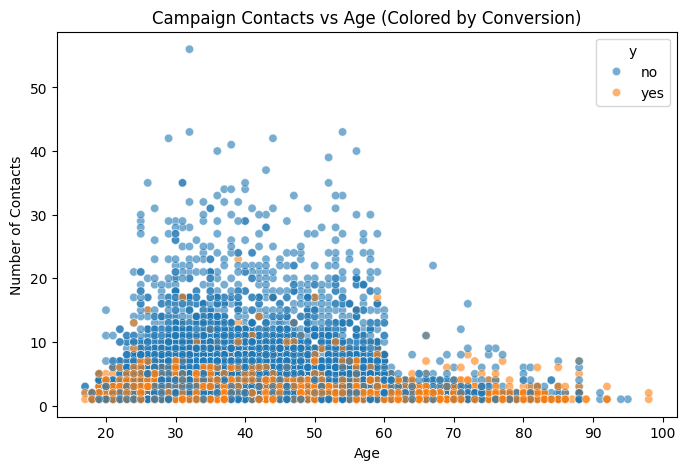

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="age",
    y="campaign",
    hue="y",
    alpha=0.6
)
plt.title("Campaign Contacts vs Age (Colored by Conversion)")
plt.xlabel("Age")
plt.ylabel("Number of Contacts")
plt.show()


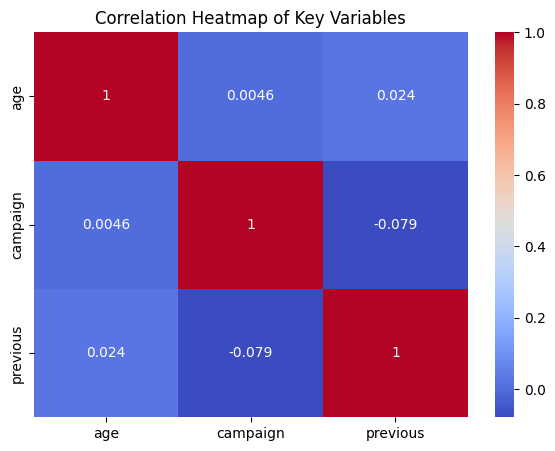

In [22]:
corr_data = df[["age", "campaign", "previous"]].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_data, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Key Variables")
plt.show()

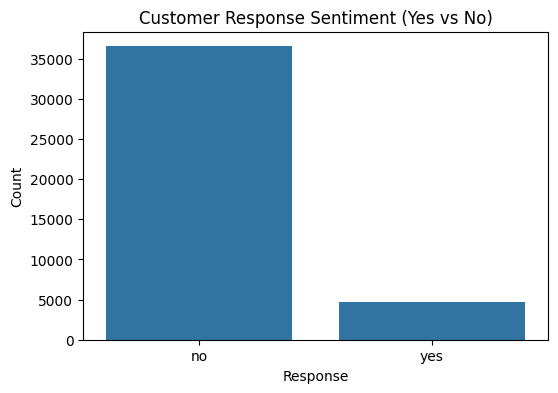

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="y")
plt.title("Customer Response Sentiment (Yes vs No)")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()


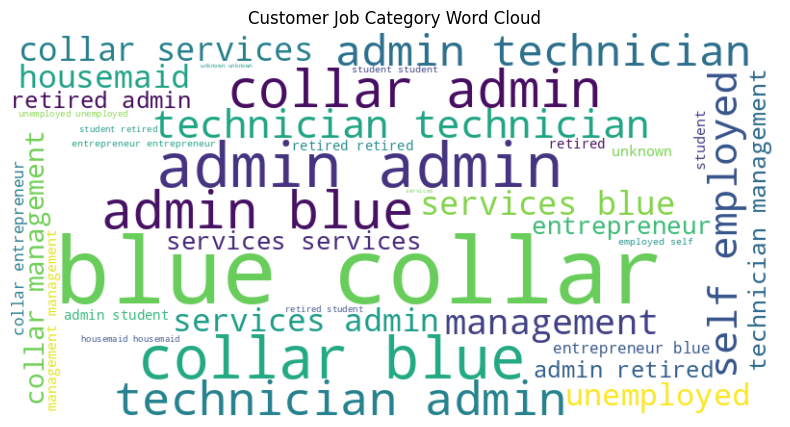

In [26]:
from wordcloud import WordCloud

text = " ".join(df["job"].dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Customer Job Category Word Cloud")
plt.show()
